# [CV-03] 잘 만든 Augmentation, 이미지 100장 안 부럽다

## Tensorflow

### 데이터 불러오기

In [3]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import os
from google.colab import files

sample_img_path = '/content/mycat.jpeg'
sample_img_path

'/content/mycat.jpeg'

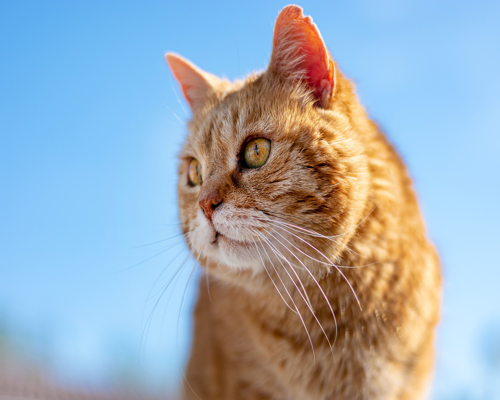

In [4]:
image = Image.open(sample_img_path).resize((500, 400)) # 이미지에 따라 숫자 변경하기
image_tensor = tf.keras.preprocessing.image.img_to_array(image)

image

### Flip

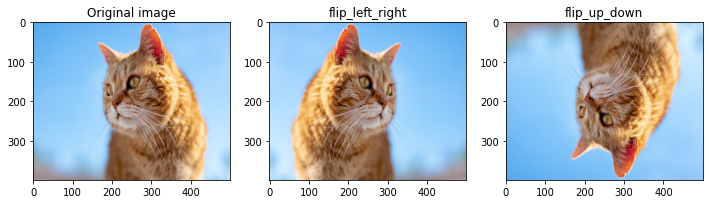

In [5]:
flip_lr_tensor = tf.image.flip_left_right(image_tensor)
flip_ud_tensor = tf.image.flip_up_down(image_tensor)
flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)

plt.figure(figsize=(12, 12))

plt.subplot(1,3,1)
plt.title('Original image')
plt.imshow(image)

plt.subplot(1,3,2)
plt.title('flip_left_right')
plt.imshow(flip_lr_image)

plt.subplot(1,3,3)
plt.title('flip_up_down')
plt.imshow(flip_ud_image)

plt.show()

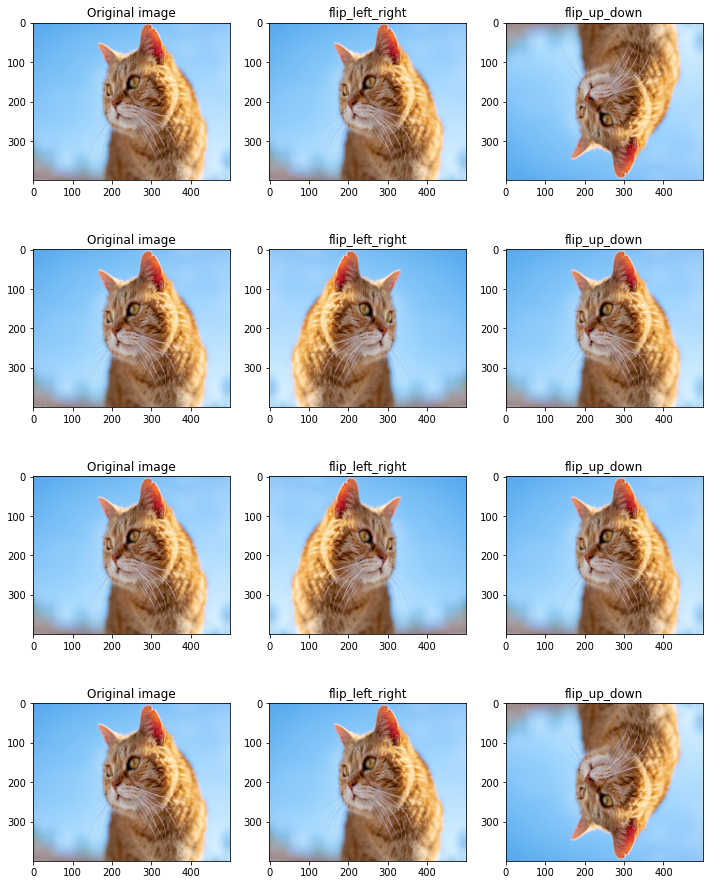

In [6]:
plt.figure(figsize=(12, 16))

row = 4
for i in range(row):
    flip_lr_tensor = tf.image.random_flip_left_right(image_tensor)
    flip_ud_tensor = tf.image.random_flip_up_down(image_tensor)
    flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
    flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)
    
    plt.subplot(4,3,i*3+1)
    plt.title('Original image')
    plt.imshow(image)

    plt.subplot(4,3,i*3+2)
    plt.title('flip_left_right')
    plt.imshow(flip_lr_image)

    plt.subplot(4,3,i*3+3)
    plt.title('flip_up_down')
    plt.imshow(flip_ud_image)

### Center Crop

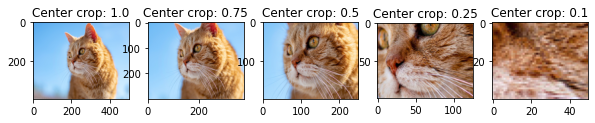

In [7]:
plt.figure(figsize=(12, 15))

central_fractions = [1.0, 0.75, 0.5, 0.25, 0.1]
col = len(central_fractions)
for i, frac in enumerate(central_fractions):
    cropped_tensor = tf.image.central_crop(image_tensor, frac)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.title(f'Center crop: {frac}')
    plt.imshow(cropped_img)

In [9]:
def random_central_crop(image_tensor, range=(0, 1)):
    central_fraction = tf.random.uniform([1], minval=range[0], maxval=range[1], dtype=tf.float32)
    cropped_tensor = tf.image.central_crop(image_tensor, central_fraction)
    return cropped_tensor

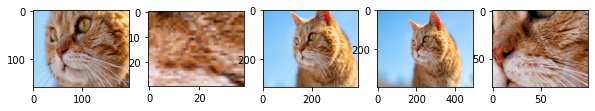

In [10]:
plt.figure(figsize=(12, 15))

col = 5
for i, frac in enumerate(central_fractions):
    cropped_tensor =random_central_crop(image_tensor)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.imshow(cropped_img)

### tf.image.random_crop()

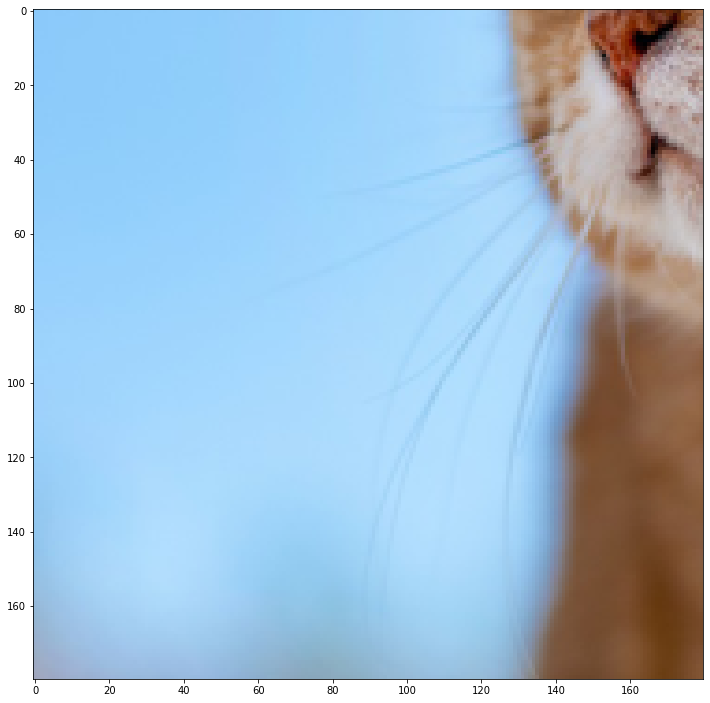

In [11]:
# apply random_crop on image
plt.figure(figsize=(12, 15))

random_crop_tensor = tf.image.random_crop(image_tensor,[180,180,3])
random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)

plt.imshow(random_crop_image)
plt.show()

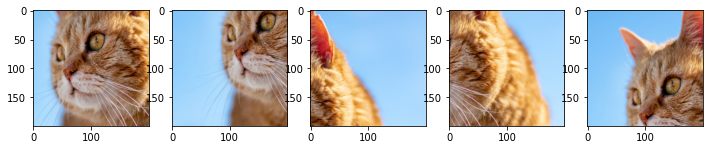

In [12]:
# display 5 random cropped images
plt.figure(figsize=(12, 15))

for i in range(5):
  random_crop_tensor = tf.image.random_crop(image_tensor,[200,200,3])
  random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)
  plt.subplot(1,5,i+1)
  plt.imshow(random_crop_image)

### tf.image.random_brightness()

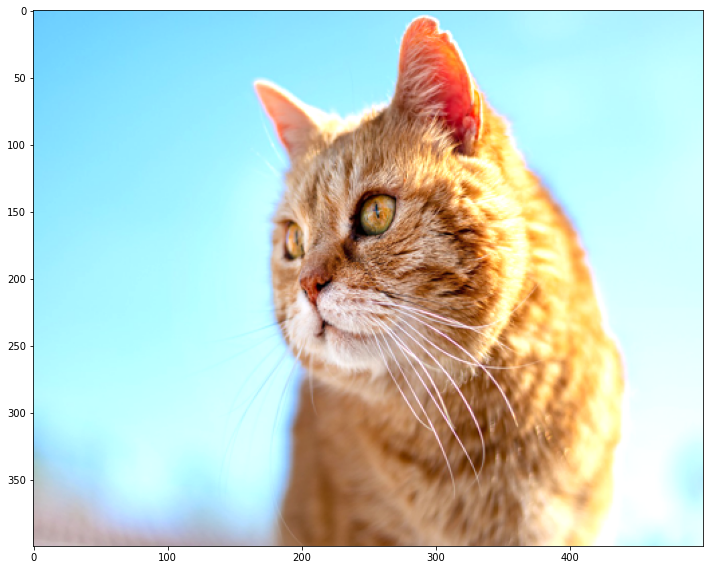

In [13]:
# apply random_brightness on image
plt.figure(figsize=(12, 15))

random_bright_tensor = tf.image.random_brightness(image_tensor, max_delta=128)
random_bright_tensor = tf.clip_by_value(random_bright_tensor, 0, 255)
random_bright_image = tf.keras.preprocessing.image.array_to_img(random_bright_tensor)

plt.imshow(random_bright_image)
plt.show()

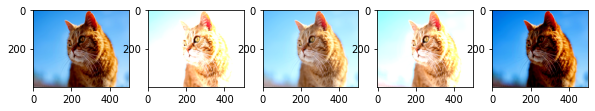

In [14]:
# display 5 random brightness images
plt.figure(figsize=(12, 15))

col = 5
for i in range(5):
    random_bright_tensor = tf.image.random_brightness(image_tensor, max_delta=128)
    random_bright_tensor = tf.clip_by_value(random_bright_tensor, 0, 255)
    random_bright_image = tf.keras.preprocessing.image.array_to_img(random_bright_tensor)

    plt.subplot(1,col+1,i+1)
    plt.imshow(random_bright_image)